In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10032,-121.07,39.22,52.0,2432.0,495.0,928.0,435.0,2.4250,INLAND,121100.0
15161,-117.03,32.97,16.0,3936.0,694.0,1935.0,659.0,4.5625,<1H OCEAN,231200.0
7778,-118.08,33.91,30.0,3259.0,942.0,2744.0,895.0,2.8608,<1H OCEAN,165600.0
436,-122.30,37.88,52.0,409.0,97.0,208.0,98.0,1.6971,NEAR BAY,138800.0
9063,-118.16,34.68,9.0,4303.0,900.0,2240.0,861.0,3.7807,INLAND,110900.0
...,...,...,...,...,...,...,...,...,...,...
2824,-119.07,35.42,19.0,3889.0,832.0,1872.0,731.0,2.6812,INLAND,107600.0
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,<1H OCEAN,218200.0
14609,-117.19,32.81,33.0,5226.0,833.0,2221.0,839.0,5.1491,NEAR OCEAN,207000.0
14825,-117.09,32.67,37.0,1157.0,332.0,983.0,306.0,2.0972,NEAR OCEAN,117000.0


In [13]:
train_data_without_op = train_data.drop(['ocean_proximity'], axis = 1)

In [14]:
train_data_without_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10032,-121.07,39.22,52.0,2432.0,495.0,928.0,435.0,2.4250,121100.0
15161,-117.03,32.97,16.0,3936.0,694.0,1935.0,659.0,4.5625,231200.0
7778,-118.08,33.91,30.0,3259.0,942.0,2744.0,895.0,2.8608,165600.0
436,-122.30,37.88,52.0,409.0,97.0,208.0,98.0,1.6971,138800.0
9063,-118.16,34.68,9.0,4303.0,900.0,2240.0,861.0,3.7807,110900.0
...,...,...,...,...,...,...,...,...,...
2824,-119.07,35.42,19.0,3889.0,832.0,1872.0,731.0,2.6812,107600.0
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,218200.0
14609,-117.19,32.81,33.0,5226.0,833.0,2221.0,839.0,5.1491,207000.0
14825,-117.09,32.67,37.0,1157.0,332.0,983.0,306.0,2.0972,117000.0


In [15]:
count_zeros = (train_data_without_op == 0).sum()
print(count_zeros)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [16]:
train_data_without_op.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923859,-0.112348,0.047142,0.070407,0.100848,0.057293,-0.018474,-0.053137
latitude,-0.923859,1.000000,0.012522,-0.037355,-0.066600,-0.109287,-0.072051,-0.077867,-0.138335
housing_median_age,-0.112348,0.012522,1.000000,-0.357717,-0.317920,-0.293251,-0.299169,-0.109009,0.113291
total_rooms,0.047142,-0.037355,-0.357717,1.000000,0.931190,0.855603,0.918086,0.195487,0.131820
total_bedrooms,0.070407,-0.066600,-0.317920,0.931190,1.000000,0.876437,0.978924,-0.008184,0.049363
population,0.100848,-0.109287,-0.293251,0.855603,0.876437,1.000000,0.906222,0.003333,-0.026281
households,0.057293,-0.072051,-0.299169,0.918086,0.978924,0.906222,1.000000,0.012785,0.064904
median_income,-0.018474,-0.077867,-0.109009,0.195487,-0.008184,0.003333,0.012785,1.000000,0.685716
median_house_value,-0.053137,-0.138335,0.113291,0.131820,0.049363,-0.026281,0.064904,0.685716,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

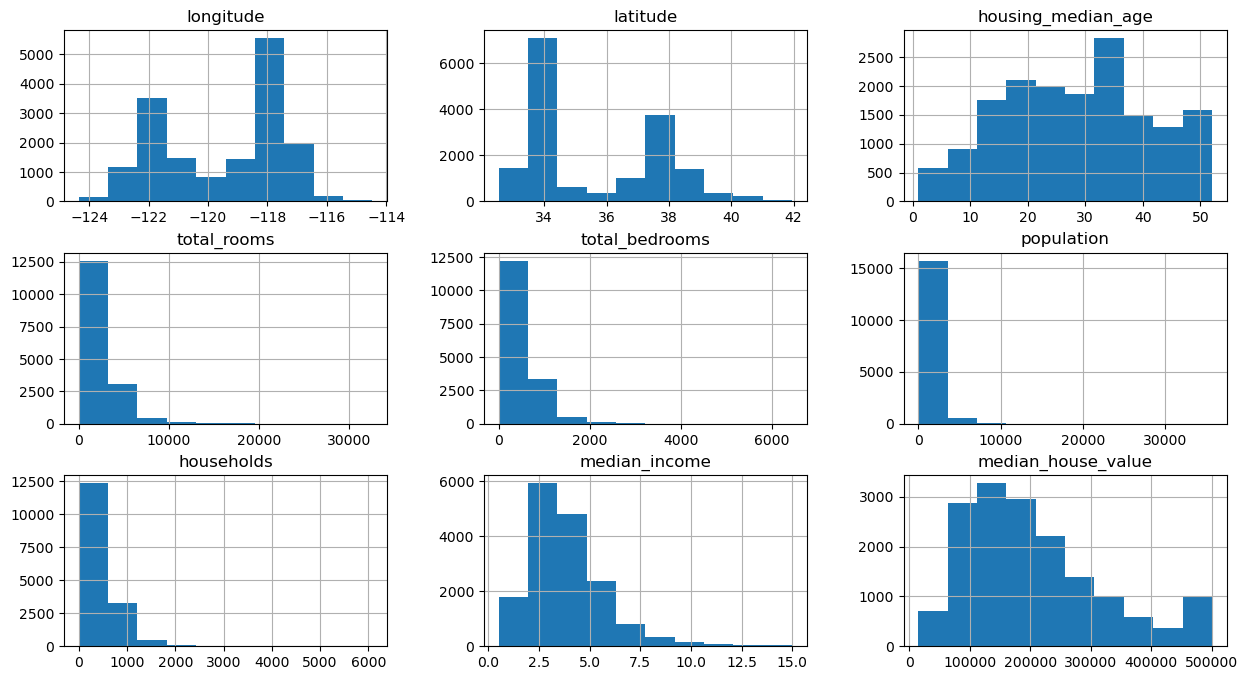

In [17]:
train_data_without_op.hist(figsize = (15, 8))

<Axes: >

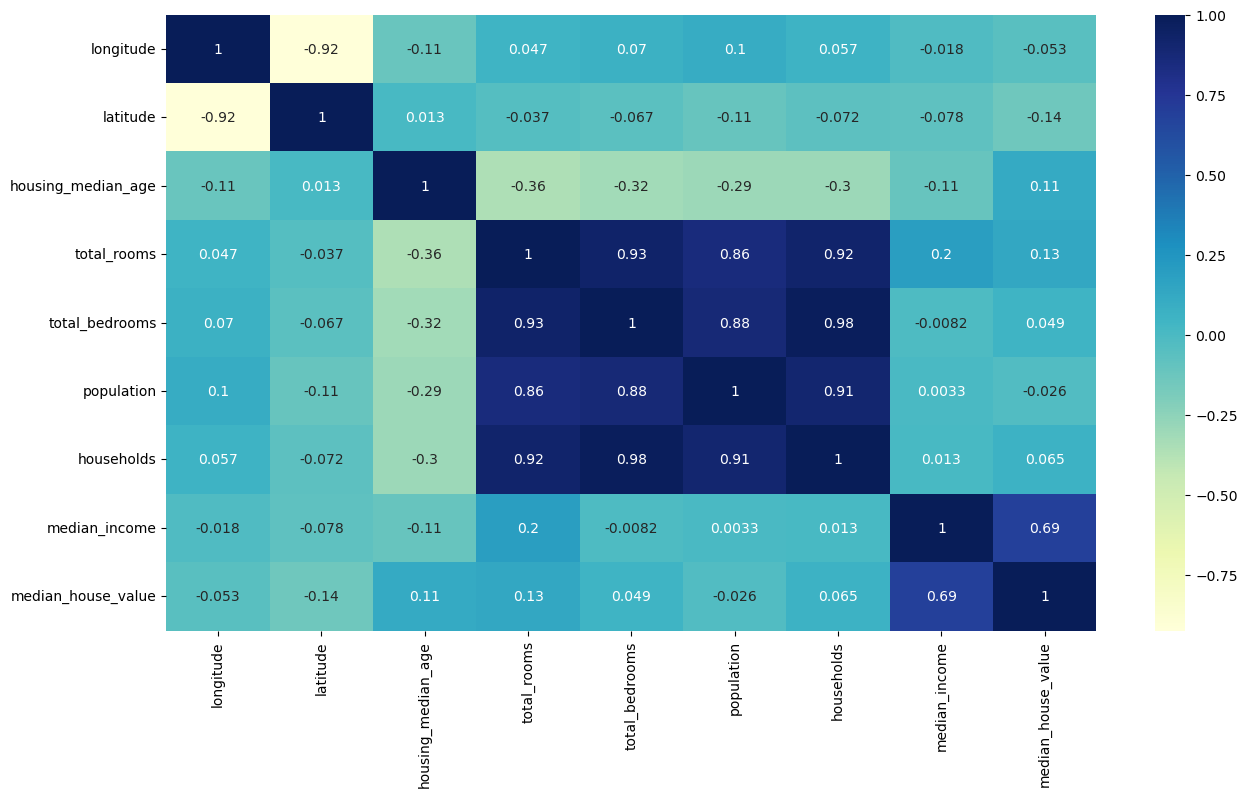

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_without_op.corr(), annot = True, cmap = "YlGnBu")

In [19]:
transformed_households, lambda_value1 = boxcox(train_data_without_op['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(train_data_without_op['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(train_data_without_op['population'])
transformed_totalrooms, lambda_value4 = boxcox(train_data_without_op['total_rooms'])

In [20]:
train_data_without_op['households'] = transformed_households
train_data_without_op['total_bedrooms'] = transformed_totalsbedrooms
train_data_without_op['total_rooms'] = transformed_totalrooms
train_data_without_op['population'] = transformed_population

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

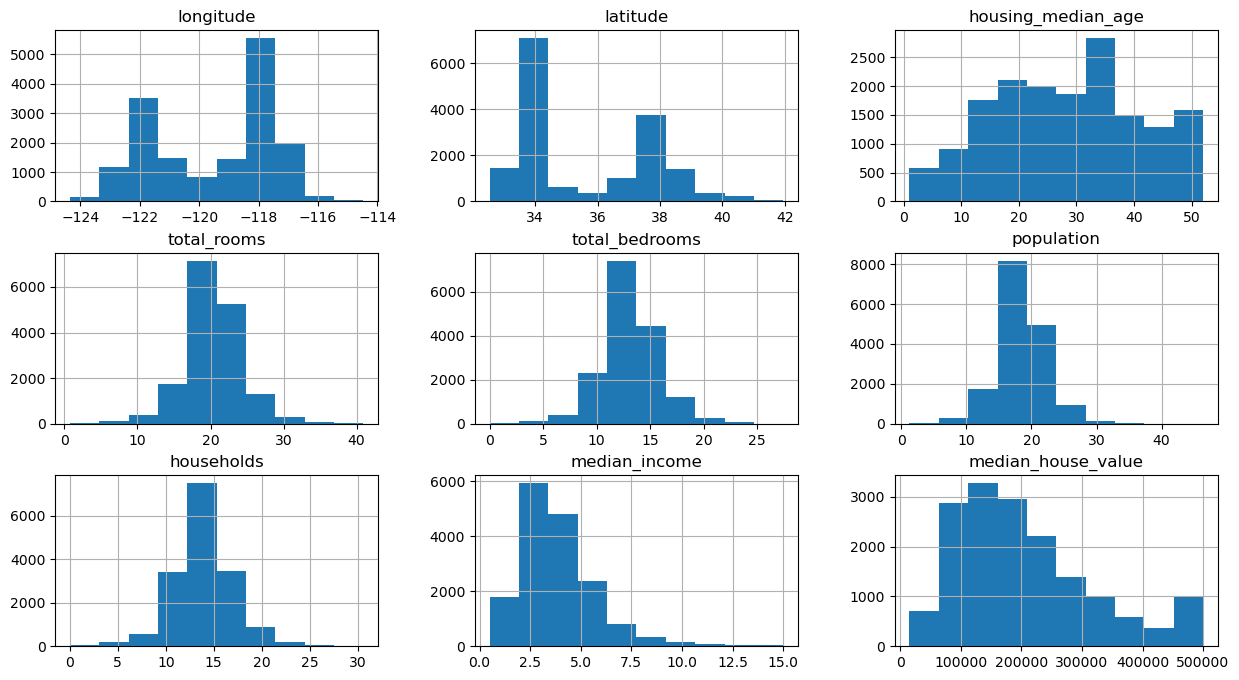

In [21]:
train_data_without_op.hist(figsize = (15, 8))

# Start preprocess

In [22]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10032,False,True,False,False,False
15161,True,False,False,False,False
7778,True,False,False,False,False
436,False,False,False,True,False
9063,False,True,False,False,False
...,...,...,...,...,...
2824,False,True,False,False,False
8141,True,False,False,False,False
14609,False,False,False,False,True
14825,False,False,False,False,True


In [25]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [26]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [27]:
transformed_households, lambda_value4 = boxcox(data['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(data['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(data['population'])
transformed_totalrooms, lambda_value1 = boxcox(data['total_rooms'])

data['households'] = transformed_households
data['total_bedrooms'] = transformed_totalsbedrooms
data['total_rooms'] = transformed_totalrooms
data['population'] = transformed_population

In [28]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,False,True,False,False,False


In [29]:
data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,0,1,0,0,0


In [31]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
train_data = X_train.join(y_train)

<Axes: >

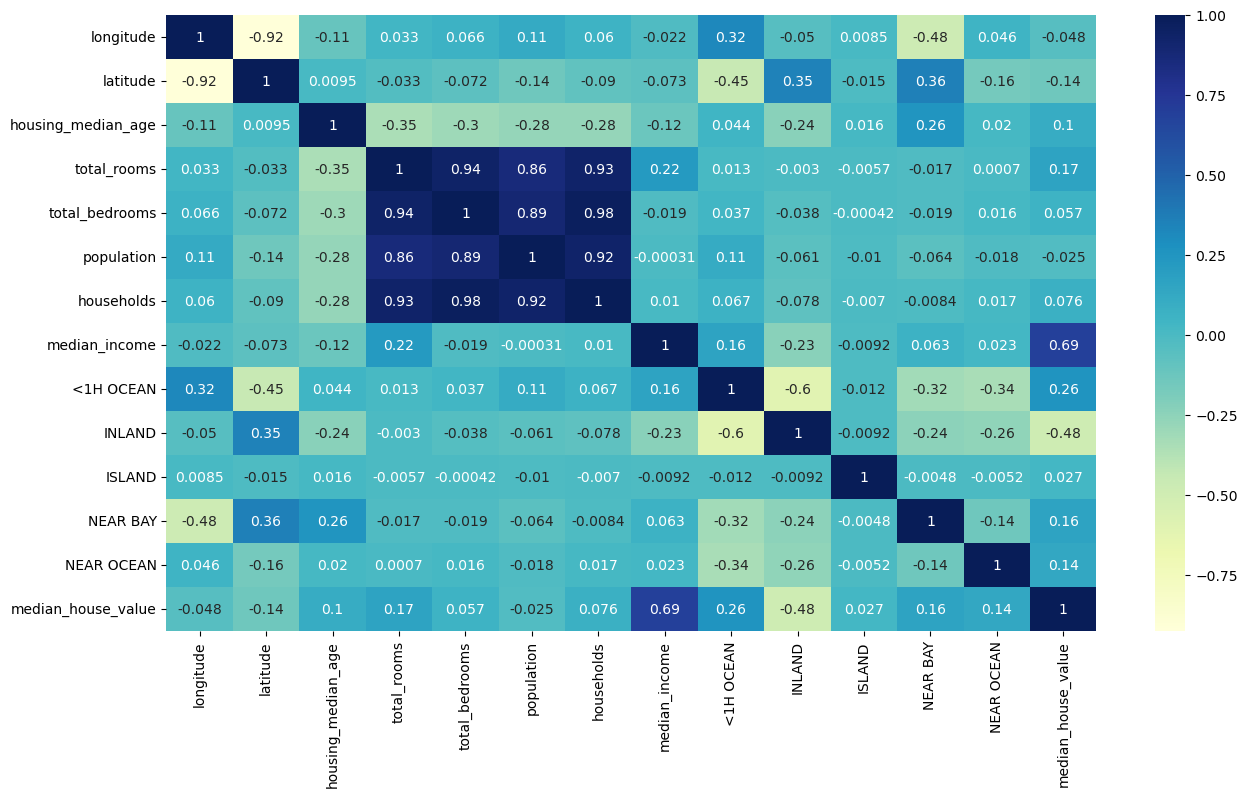

In [34]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [35]:
Scaler = StandardScaler()

In [36]:
X_train_scaler = Scaler.fit_transform(X_train)
X_test_scaler = Scaler.transform(X_test)
X_validate_scaler = Scaler.transform(X_validate)

# End preprocess

## Linear Regression 

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(X_train_scaler, y_train)

LinearRegression()

In [39]:
reg.score(X_validate_scaler, y_validate)

0.6824074055047504

In [40]:
reg_lasso = Lasso()
reg_ridge = Ridge()

In [41]:
reg_lasso.fit(X_train_scaler, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+12, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [42]:
reg_ridge.fit(X_train_scaler, y_train)

Ridge()

In [43]:
reg_lasso.score(X_validate_scaler, y_validate)

0.6824099484782078

In [44]:
reg_lasso.coef_

array([-59098.84393925, -60988.38171711,  13390.45077359, -31619.09299046,
        68237.62870486, -62811.91963409,  29233.73690451,  79753.7864774 ,
         7381.81289996,  -8538.34723276,   2707.48156323,   1591.94918141,
         4198.27378747])

In [45]:
reg_lasso.intercept_

206644.400097883

In [46]:
reg_ridge.score(X_validate_scaler, y_validate)

0.6824215518897303

In [47]:
reg_ridge.coef_

array([-58991.74438961, -60877.39866598,  13391.10422363, -31538.87347166,
        68091.58832625, -62794.20689409,  29285.91163217,  79730.25775242,
         6179.52782328,  -9699.35686297,   2676.6777175 ,    831.95702852,
         3393.26620557])

In [48]:
reg_ridge.intercept_

206644.400097883

In [49]:
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(reg_ridge, param_grid_ridge, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

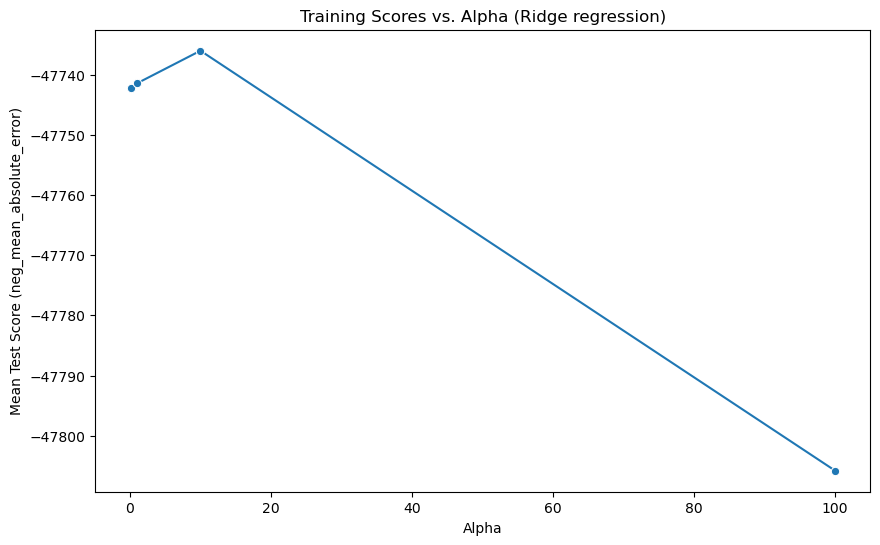

In [50]:
results = pd.DataFrame(grid_search_ridge.cv_results_)

param_cols = ['param_alpha', 'mean_test_score']
subset = results[param_cols].copy()  

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_alpha', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Alpha (Ridge regression)')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (neg_mean_absolute_error)')

plt.show()

In [51]:
grid_search_ridge.best_estimator_

Ridge(alpha=10)

In [52]:
best_ridge = grid_search_ridge.best_estimator_

In [53]:
best_ridge.score(X_validate_scaler, y_validate)

0.6825301971158554

## Random forest

In [54]:
forest = RandomForestRegressor()

In [55]:
forest.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [56]:
forest.score(X_validate_scaler, y_validate)

0.827658728168971

In [57]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_features" : [6, 12, 20],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6)

In [59]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6)


In [60]:
best_forest = grid_search.best_estimator_

In [61]:
best_forest.score(X_validate_scaler, y_validate)

0.8274592861175137

## Neural network

In [62]:
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=5000, learning_rate_init=0.001, random_state=42)

nn.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=42)

In [63]:
nn.score(X_validate_scaler, y_validate)

0.7889377868793123

## KNN

In [64]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')

knn.fit(X_train_scaler, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [65]:
knn.score(X_validate_scaler, y_validate)

0.7316256778747743

In [66]:
param_grid = {
    'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 
}

In [67]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=4, weights='distance'),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15, 16]},
             scoring='neg_mean_absolute_error')

In [68]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [69]:
best_knn = grid_search.best_estimator_

In [70]:
print(best_knn)

KNeighborsRegressor(n_neighbors=8, weights='distance')


In [71]:
best_knn.score(X_validate_scaler, y_validate)

0.7485789895290835

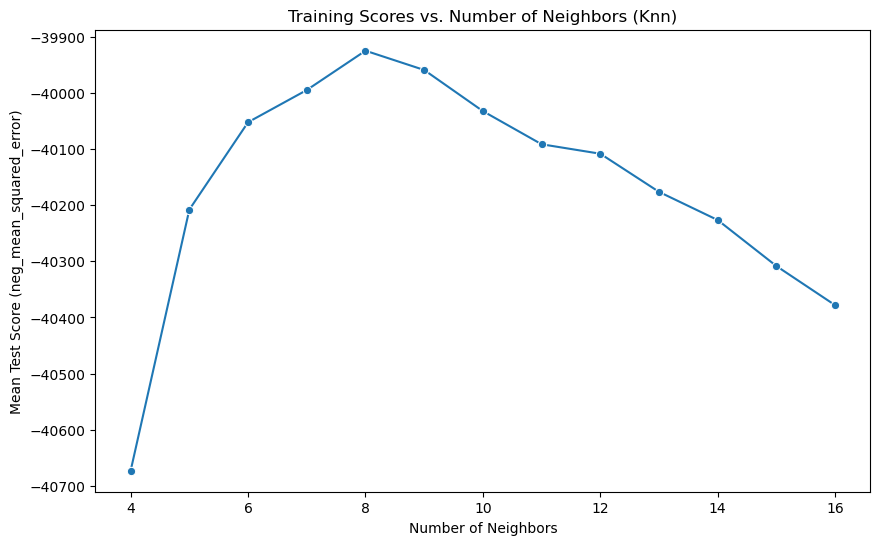

In [72]:
results = pd.DataFrame(grid_search.cv_results_)

param_cols = ['param_n_neighbors', 'mean_test_score']
subset = results[param_cols].copy()  

subset['param_n_neighbors'] = subset['param_n_neighbors'].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Number of Neighbors (Knn)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (neg_mean_squared_error)')

plt.show()

In [73]:
min_mean_test_score = results['mean_test_score'].min()
max_mean_test_score = results['mean_test_score'].max()

print(f'Min Mean Test Score: {min_mean_test_score}')
print(f'Max Mean Test Score: {max_mean_test_score}')


Min Mean Test Score: -40673.16086793538
Max Mean Test Score: -39924.59117002491


## SVM

In [89]:
svm_reg = svm.SVR()

In [97]:
pipeline = make_pipeline(StandardScaler(), svm_reg)

In [98]:
param_grid = {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.01, 0.1, 0.2], 'svr__kernel': ['linear', 'rbf']}

In [103]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.01, 0.1, 0.2],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [104]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

svr_best = grid_search.best_estimator_
y_pred_svr = svr_best.predict(X_test)

Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}


D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [105]:
svr_best.predict(X_test_scaler)

array([196448.07320148, 209060.01771138, 120317.15265348, ...,
       191890.97965371, 141334.6481915 , 203773.16465844])

In [106]:
svr_best.score(X_validate_scaler, y_validate)

0.5386878873932843

## Predict on test set

In [74]:
best_ridge.predict(X_test_scaler)

array([252617.76573329, 276497.66092492, 123348.54912679, ...,
       246215.48700232, 120618.41090289, 177787.96686613])

In [75]:
best_forest.predict(X_test_scaler)

array([202792.04, 372078.11, 105059.  , ..., 276317.06, 103574.  ,
       100253.  ])

In [76]:
nn.predict(X_test_scaler)

array([199389.22944828, 344913.86136946,  99668.70220338, ...,
       259323.19141944, 153304.97578508,  99592.2095619 ])

In [77]:
best_knn.predict(X_test_scaler)

array([127986.51621699, 281176.76761233,  88977.54618983, ...,
       148662.37632542, 157722.69674435,  82254.67837296])

In [117]:
svr_best.predict(X_test_scaler)

array([196448.07320148, 209060.01771138, 120317.15265348, ...,
       191890.97965371, 141334.6481915 , 203773.16465844])

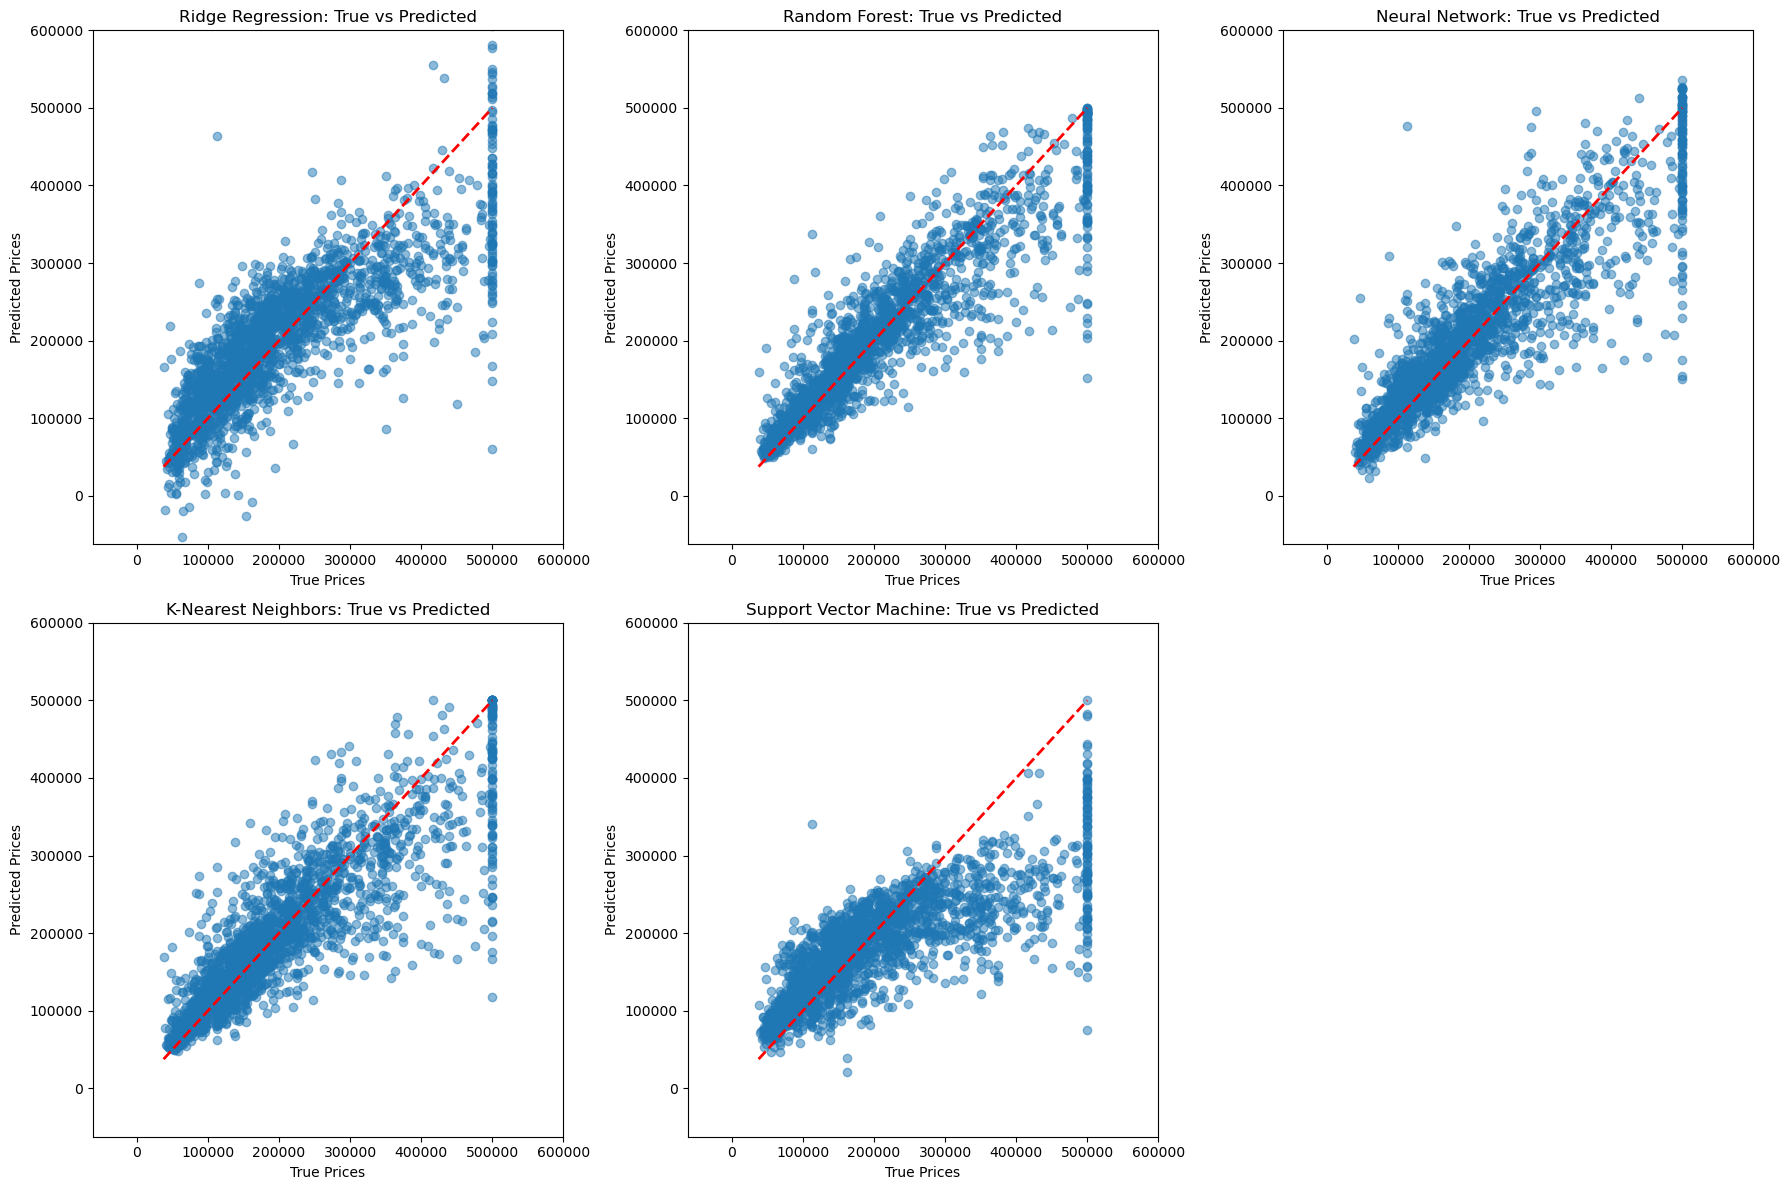

In [113]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(y_test, ridge_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Ridge Regression: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 2)
plt.scatter(y_test, forest_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 3)
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Neural Network: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 4)
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('K-Nearest Neighbors: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 3, 5)
plt.scatter(y_test, svm_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Support Vector Machine: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.tight_layout()
plt.show()


## Predict on 1 data point

In [78]:
test1 = np.array([[-122.25, 37.85, 52, 1627, 280, 565, 259, 3.8462, 0, 0, 0, 1, 0]])

lambdas = np.array([lambda_value1, lambda_value2, lambda_value3, lambda_value4])

test1[0, 3] = boxcox(test1[0, 3], lmbda=lambda_value1)
test1[0, 4] = boxcox(test1[0, 4], lmbda=lambda_value2)
test1[0, 5] = boxcox(test1[0, 5], lmbda=lambda_value3)
test1[0, 6] = boxcox(test1[0, 6], lmbda=lambda_value4)

test1_scaled = Scaler.transform(test1)

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
best_ridge.predict(test1_scaled)

array([259236.89114037])

In [80]:
best_forest.predict(test1_scaled)

array([296478.])

In [81]:
nn.predict(test1_scaled)

array([262666.99037642])

In [82]:
best_knn.predict(test1_scaled)

array([342200.])

In [116]:
svr_best.predict(test1_scaled)

array([220366.97946697])